In [2]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange

In [9]:
n = 50
m = 100
num_itr = 50
K = 100
Rambda = 3.0
adam_lr1 = 1e-4
adam_lr2 = 1e-2
max_inner = 50
A = np.random.randn(m, n)
Pinv = LA.inv(A.T @ A + Rambda * np.eye(A.shape[-1]) ) @ A.T
eig, _ = LA.eig(A.T @ A + Rambda * np.eye(A.shape[-1]))
lambda_min = min(eig)
lambda_max = max(eig)
eta_opt = 2/(lambda_min + lambda_max)

In [11]:
def gen_x_opt(y):
    return Pinv @ y
batch_gen_x_opt = jax.vmap(gen_x_opt, in_axes=-1,out_axes=-1)

In [12]:
def get_dot(x):
    return x @ x.T
batch_get_dot = jax.vmap(get_dot, in_axes=-1, out_axes=-1)

In [14]:
def GD(max_itr, y):
    x = np.zeros((n, K))
    for i in range(max_itr):
        x -= eta_opt * ( A.T @ ( A@x - y) + Rambda * x)
    return x

def comp_mse(max_itr):
    y = np.random.randn(m, K)
    x_opt = batch_gen_x_opt(y)
    x_hat = GD(max_itr, y)
    return np.sum(batch_get_dot(x_opt - x_hat))/K

In [15]:
df = pd.DataFrame()
df["iteration"] = list(range(num_itr))
df["GD (fixed step size)"] = [float(comp_mse(i)) for i in range(num_itr)]

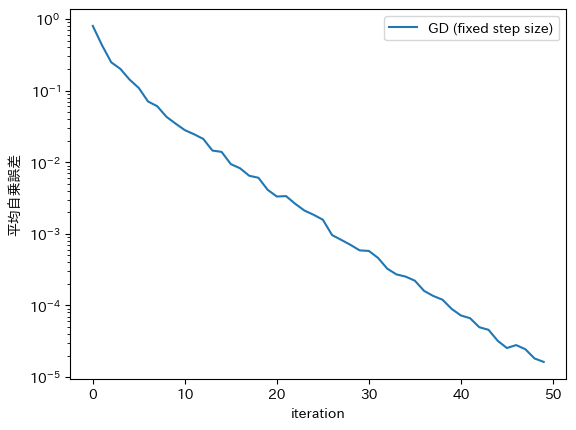

In [16]:
df.plot("iteration", ["GD (fixed step size)"])
plt.yscale("log")
plt.ylabel("平均自乗誤差");